In [12]:
import cftime
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.interpolate import interp2d

In [13]:
def find_nearest(array, value):
    n = [abs(i-value) for i in array]
    idx = n.index(min(n))
    return idx, array[idx]

### GS separation latitude

In [14]:

# longitude & depth slice
chosen_lon = -72
chosen_depth = 200
isotherm = 15


In [15]:
data_dir = '/data/users/smoreton/VALNA/DATA/'

ds = xr.open_dataset(data_dir+'u-ai758/nemo_ai758o_1y_19801201_NA_crop_T.nc')

# selecting chosen depth
T_z_slice = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0][0]

# selecting chosen longitude
idx_x, lon_check = find_nearest(ds.nav_lon_grid_T.values[0,:], chosen_lon) #y,x
idx_x, lon_check

# finding lat at chosen isotherm
idx_y, T_check = find_nearest(T_z_slice[:,idx_x].values, isotherm)
idx_y, T_check

print (T_check)
sep_latitude = ds.nav_lat_grid_T[idx_y,idx_x].values
sep_latitude

15.352747


array(38.816387, dtype=float32)

In [16]:
# obs data
mdir = '/data/users/smoreton/Obs/EN4_analysis/raw_zipped/' 

no_years = 20 
all_years = np.linspace(2001, 2020, no_years).astype(int)
isotherm_allyrs = np.zeros((no_years, 25, 80))

for i in range(len(all_years)):
    year = all_years[i]
    
    file = 'EN4_'+str(year)+'_anav.nc'
    ds_obs = xr.open_dataset(mdir + file)

    # converting temp from K to C
    ds_obs['temperature'] = ds_obs.temperature - 273.15
    ds_obs.temperature.attrs['units'] = 'degC'
    
    #cropping to NA: -80-0 degW 25-50 degN 
    imin = find_nearest(ds_obs.lon, 280)
    imax = find_nearest(ds_obs.lon, 360)
    jmin = find_nearest(ds_obs.lat, 25)
    jmax = find_nearest(ds_obs.lat, 50)
    
    # jmin[0] # 108
    # jmax[0] # 133
    # imin[0] # 279
    # imax[0] # 359
    
    ds_obs = ds_obs.isel(lat=slice(108,133), lon=slice(279,359))

    Z = ds_obs.sel(depth=[chosen_depth],method='nearest').temperature[0][0]
    
    isotherm_allyrs[i,:,:] = Z
    

In [ ]:
#  u-ar435   | GO6-1deg      | -        | darkred         |
#  u-ah494   | GO6-1/4deg    | -        | navy            |
#  mi-aq915  | GO6-1/12deg   | -        | darkturquoise   |
#  u-ak108   | GC3.1 1deg    | -        | indianred       |
#  u-ai758   | GC3.1 1/4deg  | -        | cornflowerblue  |
#  u-aj393   | GC3.1 1/12deg | -        | teal            |

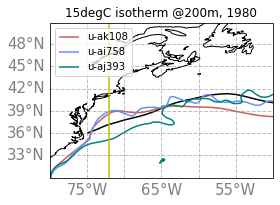

In [39]:
#plotting  1 yr, 1980

data_dir = '/data/users/smoreton/VALNA/DATA/'
save_dir = '/home/h02/smoreton/Documents/VALNA/FIGURES/GS_sep_NAC/'

plt.figure(figsize=(4,4))

ax = plt.axes(projection=ccrs.PlateCarree())

# obs
ax.contour(ds_obs.lon-360, ds_obs.lat, isotherm_allyrs.mean(axis=0), levels=[isotherm],colors='k',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ak108/nemo_ak108o_1y_19801201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='indianred',transform=ccrs.PlateCarree(), label='test')

ds = xr.open_dataset(data_dir+'u-ai758/nemo_ai758o_1y_19801201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS2 = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='cornflowerblue',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-aj393/nemo_aj393o_1y_19801201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS3 = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='teal',transform=ccrs.PlateCarree())

ax.axvline(x=chosen_lon,color='y')

plt.ylim(20,50)
plt.title('15degC isotherm @200m, 1980')

#adding custom legend
model1 = ['u-ak108']
model2 = ['u-ai758']
model3 = ['u-aj393']
for i in range(len(labels)):
    CS.collections[i].set_label(model1[i])
    CS2.collections[i].set_label(model2[i])
    CS3.collections[i].set_label(model3[i])
plt.legend(loc='upper left')


ax.coastlines()
ax.set_extent([-80, -50, 30, 50])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir+'coupled_GS_sep_map_1980.png', bbox_inches='tight', dpi=250)

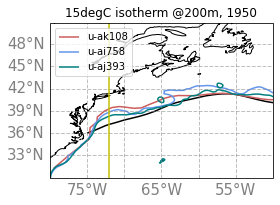

In [41]:
plt.figure(figsize=(4,4))

ax = plt.axes(projection=ccrs.PlateCarree())

# obs
ax.contour(ds_obs.lon-360, ds_obs.lat, isotherm_allyrs.mean(axis=0), levels=[isotherm],colors='k',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ak108/nemo_ak108o_1y_19501201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='indianred',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ai758/nemo_ai758o_1y_19501201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS2 = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='cornflowerblue',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-aj393/nemo_aj393o_1y_19501201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS3 = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='teal',transform=ccrs.PlateCarree())

ax.axvline(x=chosen_lon,color='y')

plt.ylim(20,50)
plt.title('15degC isotherm @200m, 1950')

#adding custom legend
model1 = ['u-ak108']
model2 = ['u-ai758']
model3 = ['u-aj393']
for i in range(len(labels)):
    CS.collections[i].set_label(model1[i])
    CS2.collections[i].set_label(model2[i])
    CS3.collections[i].set_label(model3[i])
plt.legend(loc='upper left')

ax.coastlines()
ax.set_extent([-80, -50, 30, 50])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir+'coupled_GS_sep_map_1950.png', bbox_inches='tight', dpi=250)

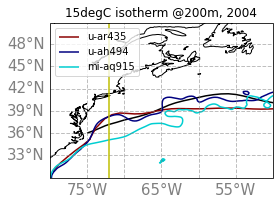

In [44]:
plt.figure(figsize=(4,4))

ax = plt.axes(projection=ccrs.PlateCarree())

# obs
ax.contour(ds_obs.lon-360, ds_obs.lat, isotherm_allyrs.mean(axis=0), levels=[isotherm],colors='k',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ar435/nemo_ar435o_1y_20041201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='darkred',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ah494/nemo_ah494o_1y_20041201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').votemper[0,0,:,:]
CS2 = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='navy',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'mi-aq915/nemo_aq915o_1y_20041201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS3 = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='darkturquoise',transform=ccrs.PlateCarree())

ax.axvline(x=chosen_lon,color='y')

plt.ylim(20,50)
plt.title('15degC isotherm @200m, 2004')

#adding custom legend
model1 = ['u-ar435']
model2 = ['u-ah494']
model3 = ['mi-aq915']
for i in range(len(labels)):
    CS.collections[i].set_label(model1[i])
    CS2.collections[i].set_label(model2[i])
    CS3.collections[i].set_label(model3[i])
plt.legend(loc='upper left')

ax.coastlines()
ax.set_extent([-80, -50, 30, 50])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir+'ocean_only_GS_sep_map_2004.png', bbox_inches='tight', dpi=250)

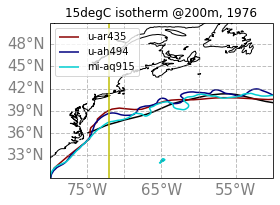

In [45]:
plt.figure(figsize=(4,4))

ax = plt.axes(projection=ccrs.PlateCarree())

# obs
ax.contour(ds_obs.lon-360, ds_obs.lat, isotherm_allyrs.mean(axis=0), levels=[isotherm],colors='k',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ar435/nemo_ar435o_1y_19761201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='darkred',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ah494/nemo_ah494o_1y_19761201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').votemper[0,0,:,:]
CS2= ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='navy',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'mi-aq915/nemo_aq915o_1y_19761201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS3 = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='darkturquoise',transform=ccrs.PlateCarree())

ax.axvline(x=chosen_lon,color='y')

plt.ylim(20,50)
plt.title('15degC isotherm @200m, 1976')

#adding custom legend
model1 = ['u-ar435']
model2 = ['u-ah494']
model3 = ['mi-aq915']
for i in range(len(labels)):
    CS.collections[i].set_label(model1[i])
    CS2.collections[i].set_label(model2[i])
    CS3.collections[i].set_label(model3[i])
plt.legend(loc='upper left')

ax.coastlines()
ax.set_extent([-80, -50, 30, 50])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir+'ocean_only_GS_sep_map_1976.png', bbox_inches='tight', dpi=250)

### NAC latitude

In [46]:

# longitude & depth slice
chosen_lon = -41
chosen_depth = 50
isotherm = 10

 
data_dir = '/data/users/smoreton/VALNA/DATA/' #model
save_dir = '/home/h02/smoreton/Documents/VALNA/FIGURES/GS_sep_NAC/'


In [47]:
# obs data
mdir = '/data/users/smoreton/Obs/EN4_analysis/raw_zipped/' 

no_years = 20 
all_years = np.linspace(2001, 2020, no_years).astype(int)
isotherm_allyrs = np.zeros((no_years, 25, 80))

for i in range(len(all_years)):
    year = all_years[i]
    
    file = 'EN4_'+str(year)+'_anav.nc'
    ds_obs = xr.open_dataset(mdir + file)

    # converting temp from K to C
    ds_obs['temperature'] = ds_obs.temperature - 273.15
    ds_obs.temperature.attrs['units'] = 'degC'
    
    #cropping to NA: -80-0 degW 35-60 degN 
    imin = find_nearest(ds_obs.lon, 280)
    imax = find_nearest(ds_obs.lon, 360)
    jmin = find_nearest(ds_obs.lat, 35)
    jmax = find_nearest(ds_obs.lat, 60)
    
    # jmin[0] # 118
    # jmax[0] # 143
    # imin[0] # 279
    # imax[0] # 359
    
    ds_obs = ds_obs.isel(lat=slice(118,143), lon=slice(279,359))

    Z = ds_obs.sel(depth=[chosen_depth],method='nearest').temperature[0][0]
    
    isotherm_allyrs[i,:,:] = Z

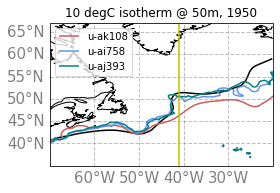

In [53]:
#plotting  1 yr, 1950,  coupled

plt.figure(figsize=(4,4))

ax = plt.axes(projection=ccrs.PlateCarree())

# obs
CS_obs = ax.contour(ds_obs.lon-360, ds_obs.lat, isotherm_allyrs.mean(axis=0), levels=[isotherm],colors='k',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ak108/nemo_ak108o_1y_19501201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='indianred', transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ai758/nemo_ai758o_1y_19501201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS2 = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='cornflowerblue',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-aj393/nemo_aj393o_1y_19501201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS3 = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='teal',transform=ccrs.PlateCarree())

ax.axvline(x=chosen_lon,color='y')

plt.title(str(isotherm)+' degC isotherm @ 50m, 1950')

#adding custom legend
model1 = ['u-ak108']
model2 = ['u-ai758']
model3 = ['u-aj393']
for i in range(len(labels)):
    CS.collections[i].set_label(model1[i])
    CS2.collections[i].set_label(model2[i])
    CS3.collections[i].set_label(model3[i])
plt.legend(loc='upper left')


ax.coastlines()
ax.set_extent([-70, -20, 35, 65])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir+'coupled_NAC_map_1950.png', bbox_inches='tight', dpi=250)

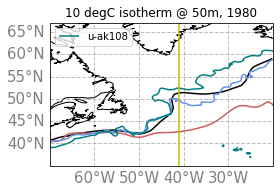

In [55]:
#plotting  1 yr, 1980, coupled

plt.figure(figsize=(4,4))

ax = plt.axes(projection=ccrs.PlateCarree())

# obs
CS_obs = ax.contour(ds_obs.lon-360, ds_obs.lat, isotherm_allyrs.mean(axis=0), levels=[isotherm],colors='k',transform=ccrs.PlateCarree())
# CS_obs = ax.contour(ds_obs.lon-360, ds_obs.lat, isotherm_allyrs.mean(axis=0), levels=25, transform=ccrs.PlateCarree())
# ax.clabel(CS_obs, inline=1, fontsize=11, fmt='%1.1f')

ds = xr.open_dataset(data_dir+'u-ak108/nemo_ak108o_1y_19801201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='indianred', transform=ccrs.PlateCarree())
# CS = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=30 ,transform=ccrs.PlateCarree())
# ax.clabel(CS, inline=1, fontsize=11, fmt='%1.1f')

ds = xr.open_dataset(data_dir+'u-ai758/nemo_ai758o_1y_19801201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='cornflowerblue',transform=ccrs.PlateCarree())
#CS = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=30 ,transform=ccrs.PlateCarree())
#ax.clabel(CS, inline=1, fontsize=11, fmt='%1.1f')

ds = xr.open_dataset(data_dir+'u-aj393/nemo_aj393o_1y_19801201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='teal',transform=ccrs.PlateCarree())
#CS = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=30 ,transform=ccrs.PlateCarree())
#ax.clabel(CS, inline=1, fontsize=11, fmt='%1.1f')

ax.axvline(x=chosen_lon,color='y')

plt.title(str(isotherm)+' degC isotherm @ 50m, 1980')

#adding custom legend
model1 = ['u-ak108']
model2 = ['u-ai758']
model3 = ['u-aj393']
for i in range(len(labels)):
    CS.collections[i].set_label(model1[i])
    CS2.collections[i].set_label(model2[i])
    CS3.collections[i].set_label(model3[i])
plt.legend(loc='upper left')


ax.coastlines()
ax.set_extent([-70, -20, 35, 65])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir+'coupled_NAC_map_1980.png', bbox_inches='tight', dpi=250)

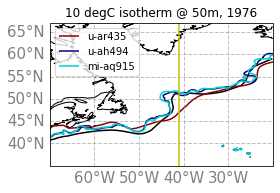

In [102]:
#plotting  1 yr, 1976,  ocean-only

plt.figure(figsize=(4,4))

ax = plt.axes(projection=ccrs.PlateCarree())

# obs
CS_obs = ax.contour(ds_obs.lon-360, ds_obs.lat, isotherm_allyrs.mean(axis=0), levels=[isotherm],colors='k',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ar435/nemo_ar435o_1y_19761201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='darkred', transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ah494/nemo_ah494o_1y_19761201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').votemper[0,0,:,:]
CS2 = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='navy',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'mi-aq915/nemo_aq915o_1y_19761201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS3 = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='darkturquoise',transform=ccrs.PlateCarree())

ax.axvline(x=chosen_lon,color='y')

plt.title(str(isotherm)+' degC isotherm @ 50m, 1976')

#adding custom legend
model1 = ['u-ar435']
model2 = ['u-ah494']
model3 = ['mi-aq915']
for i in range(len(labels)):
    CS.collections[i].set_label(model1[i])
    CS2.collections[i].set_label(model2[i])
    CS3.collections[i].set_label(model3[i])
plt.legend(loc='upper left')


ax.coastlines()
ax.set_extent([-70, -20, 35, 65])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir+'ocean_only_NAC_map_1976.png', bbox_inches='tight', dpi=250)

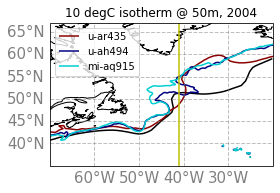

In [103]:
#plotting  1 yr, 2004,  ocean-only

plt.figure(figsize=(4,4))

ax = plt.axes(projection=ccrs.PlateCarree())

# obs
CS_obs = ax.contour(ds_obs.lon-360, ds_obs.lat, isotherm_allyrs.mean(axis=0), levels=[isotherm],colors='k',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ar435/nemo_ar435o_1y_20041201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='darkred', transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'u-ah494/nemo_ah494o_1y_20041201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').votemper[0,0,:,:]
CS2 = ax.contour(ds.nav_lon_grid_T, ds.nav_lat_grid_T, Z, levels=[isotherm],colors='navy',transform=ccrs.PlateCarree())

ds = xr.open_dataset(data_dir+'mi-aq915/nemo_aq915o_1y_20041201_NA_crop_T.nc')
Z = ds.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:]
CS3 = ax.contour(ds.nav_lon, ds.nav_lat, Z, levels=[isotherm],colors='darkturquoise',transform=ccrs.PlateCarree())

ax.axvline(x=chosen_lon,color='y')

plt.title(str(isotherm)+' degC isotherm @ 50m, 2004')

#adding custom legend
model1 = ['u-ar435']
model2 = ['u-ah494']
model3 = ['mi-aq915']
for i in range(len(labels)):
    CS.collections[i].set_label(model1[i])
    CS2.collections[i].set_label(model2[i])
    CS3.collections[i].set_label(model3[i])
plt.legend(loc='upper left')


ax.coastlines()
ax.set_extent([-70, -20, 35, 65])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
gl.xlabels_top = False
gl.ylabels_right = False

plt.savefig(save_dir+'ocean_only_NAC_map_2004.png', bbox_inches='tight', dpi=250)

### SST map off Newfoundland

In [58]:
# depth slice
chosen_depth = 0


 
data_dir = '/data/users/smoreton/VALNA/DATA/' #model
save_dir = '/home/h02/smoreton/Documents/VALNA/FIGURES/GS_sep_NAC/'
obs_dir = '/data/users/smoreton/Obs/EN4_analysis/raw_zipped/' 

levs_SST = np.linspace(0,25,26)


In [59]:
#obs

def open_EN4_file_select_NA_all_yrs(obs_dir):
    
    no_years = 20 
    all_years = np.linspace(2001, 2020, no_years).astype(int)   
    obs_NA_T = np.zeros(( no_years, 63,68 )) #1 deg
    
    for i in range(len(all_years)):
        year = all_years[i]

        file = 'EN4_'+str(year)+'_anav.nc'
        obs_ds = xr.open_dataset(obs_dir + file)

        # converting temp from K to C
        obs_ds['temperature'] = obs_ds.temperature - 273.15
        obs_ds.temperature.attrs['units'] = 'degC'

        #cropping to NA
        min_lon = 285.
        max_lon = 352.

        min_lat = 15.
        max_lat = 77.

        mask_lon = (obs_ds.lon >= min_lon) & (obs_ds.lon<= max_lon)
        mask_lat = (obs_ds.lat >= min_lat) & (obs_ds.lat <= max_lat)

        obs_NA_T[i,:,:] = obs_ds.isel(depth=0).isel(time=0).where(mask_lon & mask_lat, drop=True).temperature.values
        
        obs_NA = obs_ds.where(mask_lon & mask_lat, drop=True)
        
    #note obs_NA_T is not a dataset, it's a 3D np array with time
    # obs_NA is a 2D dataset for lon/lat
    return obs_NA_T, obs_NA

In [60]:
obs_NA_T,obs_NA = open_EN4_file_select_NA_all_yrs(obs_dir)

In [82]:
def open_model_file_select_NA(data_dir, model, year):
    
    if model == 'aq915':
        ds = xr.open_dataset(data_dir+'mi-'+model+'/nemo_'+model+'o_1y_'+year+'1201_NA_crop_T.nc')
    else:
        ds = xr.open_dataset(data_dir+'u-'+model+'/nemo_'+model+'o_1y_'+year+'1201_NA_crop_T.nc')
    
    #cropping to NA
    min_lon = -75.
    max_lon = 0.

    min_lat = 15.
    max_lat = 77.

    if model == 'ai758' or model == 'ar435' or model == 'ah494':
        x = ds.nav_lon_grid_T
        y = ds.nav_lat_grid_T
    else:
        x = ds.nav_lon
        y = ds.nav_lat
        
    mask_lon = (x >= min_lon) & (x <= max_lon)
    mask_lat = (y >= min_lat) & (y <= max_lat)

    ds_NA = ds.where(mask_lon & mask_lat, drop=True)
    return ds_NA

In [100]:

def plot_SST_map_Newfound(model, year, obs_NA_T,obs_NA):

    # regions to mark
    newf = patches.Rectangle((-43, 45), 6, 5, linewidth=3, edgecolor='navy', facecolor='none')

    if model != 'obs':
        ds_NA = open_model_file_select_NA(data_dir, model, year)
        
    else:   
        Z_obs = obs_NA_T.mean(axis=0) # time average, 20 years
        x_obs = obs_NA.lon-360
        y_obs = obs_NA.lat

    
    fig = plt.figure(figsize=np.array([4,4]))

    ax = plt.axes(projection=ccrs.PlateCarree())
        
    if model == 'obs':
        CS = ax.contourf(x_obs, y_obs, Z_obs, cmap='RdYlBu_r', levels=levs_SST, extend='both') 
        plt.colorbar(CS,orientation='horizontal')
    else: 
        if model == 'ai758' or model == 'ar435' or model == 'ah494':
            x = ds_NA.nav_lon_grid_T
            y = ds_NA.nav_lat_grid_T
        else:
            x = ds_NA.nav_lon
            y = ds_NA.nav_lat
        
        if model == 'ah494':
            Z = ds_NA.sel(deptht=[chosen_depth],method='nearest').votemper[0,0,:,:] #removing empty dimensions
        else:
            Z = ds_NA.sel(deptht=[chosen_depth],method='nearest').thetao[0,0,:,:] #removing empty dimensions

        CS = ax.contourf(x,y, Z, cmap='RdYlBu_r', levels=levs_SST, transform=ccrs.PlateCarree(),extend='both')
        plt.colorbar(CS,orientation='horizontal')

    #ax.coastlines()
    ax.set_extent([-75, -8, 25, 65])
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.LAND, color='k',zorder=100)
    
    ax.add_patch(newf)
        
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.ylabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabels_top = False
    gl.ylabels_right = False
    
    plt.title('SST '+model+', '+year)

    plt.savefig(save_dir+'SST_map_'+model+'_'+year+'.png', dpi=200)
    return 

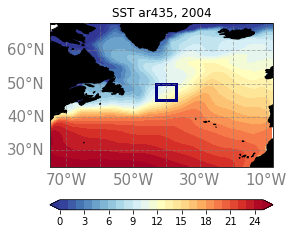

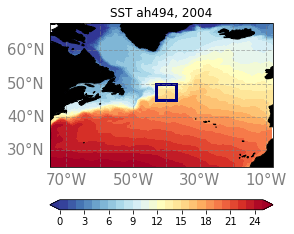

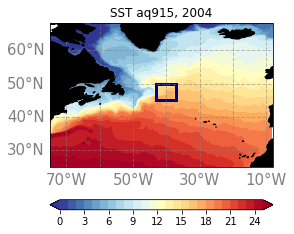

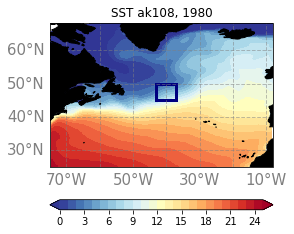

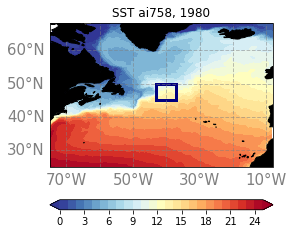

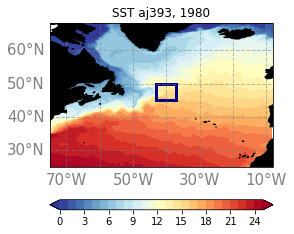

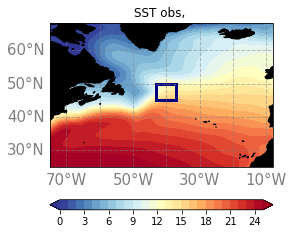

In [101]:
#plotting 1yr snapshot

plot_SST_map_Newfound('ar435', '2004', obs_NA_T,obs_NA)
plot_SST_map_Newfound('ah494', '2004', obs_NA_T,obs_NA)
plot_SST_map_Newfound('aq915', '2004', obs_NA_T,obs_NA)

plot_SST_map_Newfound('ak108', '1980', obs_NA_T,obs_NA)
plot_SST_map_Newfound('ai758', '1980', obs_NA_T,obs_NA)
plot_SST_map_Newfound('aj393', '1980', obs_NA_T,obs_NA)

plot_SST_map_Newfound('obs', '', obs_NA_T,obs_NA)

In [96]:
#     Z_obs = obs_NA_T.mean(axis=0) # time average, 20 years
#     x_obs = obs_NA.lon-360
#     y_obs = obs_NA.lat
    
#     f = interp2d(x_obs, y_obs, Z_obs, kind='linear')
#     xnew = np.linspace(-75, -8, 67)
#     ynew = np.linspace(25, 65, 67) 
#     #znew = f(xnew, ynew)
#     znew = f(x[0,:], y[:,10])
    
#     print (znew.shape)
#     print (Z.shape)
#     CS = ax.contourf(x_obs, y_obs, Z_obs, cmap='RdYlBu_r', levels=levs_SST, extend='both') #transform=ccrs.PlateCarree(),
#     plt.colorbar(CS,orientation='horizontal')
    


### SSS map in Labrador Sea